## Case Study
This consumer finance company is the largest online loan marketplace, facilitating personal loans, business loans, and financing of medical procedures that matches borrowers who are seeking a loan with investors looking to lend money. Borrowers can easily access lower interest rate loans through a fast online interface. 

In [1]:
#import libraries

import pandas as pd
import numpy as np

In [2]:
#import the file into dataset

df = pd.read_csv(r'C:\Lending_Club_Case_Study\LendingClubCaseStudy\Source_Files\loan.csv', low_memory=False)

In [3]:
#change the setting to display all columns in the dataset
#check the data types of the columns

with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    print(df.dtypes)

id                                  int64
member_id                           int64
loan_amnt                           int64
funded_amnt                         int64
funded_amnt_inv                   float64
term                               object
int_rate                           object
installment                       float64
grade                              object
sub_grade                          object
emp_title                          object
emp_length                         object
home_ownership                     object
annual_inc                        float64
verification_status                object
issue_d                            object
loan_status                        object
pymnt_plan                         object
url                                object
desc                               object
purpose                            object
title                              object
zip_code                           object
addr_state                        

## Remove Columns not useful for analysis

In [4]:
#drop the columns where all of the data in the columns is NA

df = df.dropna(axis = 1, how='all')

In [5]:
#Data Dictionary: id - A unique LC assigned ID for the loan listing.
#not useful to analyse if the applicant is likely to repay the loan based on unique Id column
del df["id"]

#Data Dictionary: member_id - A unique LC assigned Id for the borrower member.
#not useful to analyse if the applicant is likely to repay the loan based on unique Id column
del df["member_id"]

#Data Dictionary: next_pymnt_d - Next scheduled payment date
#drop the column as 38,577 rows data is missing out of 39,718 data rows in the dataframe
del df["next_pymnt_d"]

#Data Dictionary: collections_12_mths_ex_med - Number of collections in 12 months excluding medical collections
#not useful of analysis as all of the data is 0 and NA
del df["collections_12_mths_ex_med"]

#Data Dictionary: delinq_amnt - The past-due amount owed for the accounts on which the borrower is now delinquent.
#not useful of analysis as all of the data in the column is 0
del df["delinq_amnt"]

#Data Dictionary: tax_liens - A legal claim against the assets of an individual or business that fails to pay taxes owed to the government
#not useful of analysis as all of the data is 0 and NA
del df["tax_liens"]

#Data Dictionary: initial_list_status - The initial listing status of the loan. Possible values are – W, F
#not useful of analysis as all of the data is f
del df["initial_list_status"]

#Data Dictionary: policy_code - publicly available policy_code=1; new products not publicly available policy_code=2
#not useful of analysis as all of the data is 1
del df["policy_code"]

#Data Dictionary: application_type - Indicates whether the loan is an individual application or a joint application with two co-borrowers
#not useful of analysis as all of the data is individual
del df["application_type"]

#Data Dictionary: url - URL for the LC page with listing data.
#not useful of analysis as it has only loanid information alone.
del df["url"]

#Data Dictionary: desc - Loan description provided by the borrower.
#not useful of analysis as we get same data from purpose and loan title variables.
del df["desc"]


In [6]:
#Variables which are not useful to analyse as this data will not be available at time of receiving an online application
#and which cannot be used as predictors for approval

#Data Dictionary: funded_amnt - The total amount committed to that loan at that point in time.
del df["funded_amnt"]

#Data Dictionary: funded_amnt_inv - The total amount committed by investors for that loan at that point in time.
del df["funded_amnt_inv"]

#Data Dictionary: delinq_2yrs - The number of 30+ days past-due incidences of delinquency in the borrower's credit file for the past 2 years
del df["delinq_2yrs"]

#Data Dictionary: earliest_cr_line - The month the borrower's earliest reported credit line was opened
del df["earliest_cr_line"]

#Data Dictionary: inq_last_6mths - The number of inquiries in past 6 months (excluding auto and mortgage inquiries)
del df["inq_last_6mths"]

#Data Dictionary: open_acc - The number of open credit lines in the borrower's credit file.
del df["open_acc"]

#Data Dictionary: pub_rec - Number of derogatory public records.
del df["pub_rec"]

#Data Dictionary: revol_bal - Total credit revolving balance.
del df["revol_bal"]

#Data Dictionary: revol_util - Revolving line utilization rate, or the amount of credit the borrower is using relative to all available revolving credit.
del df["revol_util"]

#Data Dictionary: total_acc - The total number of credit lines currently in the borrower's credit file
del df["total_acc"]

#Data Dictionary: out_prncp - Remaining outstanding principal for total amount funded
del df["out_prncp"]

#Data Dictionary: out_prncp_inv - Remaining outstanding principal for portion of total amount funded by investors
del df["out_prncp_inv"]

#Data Dictionary: total_pymnt - Payments received to date for total amount funded
del df["total_pymnt"]

#Data Dictionary: total_pymnt_inv - Payments received to date for portion of total amount funded by investors
del df["total_pymnt_inv"]

#Data Dictionary: total_rec_prncp - Principal received to date
del df["total_rec_prncp"]

#Data Dictionary: total_rec_int - Interest received to date
del df["total_rec_int"]

#Data Dictionary: total_rec_late_fee - Late fees received to date
del df["total_rec_late_fee"]

#Data Dictionary: recoveries - post charge off gross recovery
del df["recoveries"]

#Data Dictionary: collection_recovery_fee - post charge off collection fee
del df["collection_recovery_fee"]

#Data Dictionary: last_pymnt_d - Last month payment was received
del df["last_pymnt_d"]

#Data Dictionary: last_pymnt_amnt - Last total payment amount received
del df["last_pymnt_amnt"]

#Data Dictionary: last_credit_pull_d - The most recent month LC pulled credit for this loan
del df["last_credit_pull_d"]

#Data Dictionary: mths_since_last_delinq - The number of months since the borrower's last delinquency.
del df["mths_since_last_delinq"]

#Data Dictionary: mths_since_last_record - The number of months since the last public record.
del df["mths_since_last_record"]

#Data Dictionary: pub_rec_bankruptcies - Number of public record bankruptcies
del df["pub_rec_bankruptcies"]

In [7]:
#check total NA values by columns in dataframe

df.isna().sum()

loan_amnt                      0
term                           0
int_rate                       0
installment                    0
grade                          0
sub_grade                      0
emp_title                   2459
emp_length                  1075
home_ownership                 0
annual_inc                     0
verification_status            0
issue_d                        0
loan_status                    0
pymnt_plan                     0
purpose                        0
title                         11
zip_code                       0
addr_state                     0
dti                            0
acc_now_delinq                 0
chargeoff_within_12_mths      56
dtype: int64

### Define Schema

In [8]:
#change the datatype from string to float

df['int_rate'] = df['int_rate'].str.strip('%')
df['int_rate'] = df['int_rate'].astype(float)

In [9]:
#convert to boolean datatype
#Indicates if the payment plan is put in place for the loan

Payment_Plan = {'n': True, '': False}
df['pymnt_plan'] = df['pymnt_plan'].map(Payment_Plan)

In [10]:
print(df.describe())

          loan_amnt      int_rate   installment    annual_inc           dti  \
count  39717.000000  39717.000000  39717.000000  3.971700e+04  39717.000000   
mean   11219.443815     12.021177    324.561922  6.896893e+04     13.315130   
std     7456.670694      3.724825    208.874874  6.379377e+04      6.678594   
min      500.000000      5.420000     15.690000  4.000000e+03      0.000000   
25%     5500.000000      9.250000    167.020000  4.040400e+04      8.170000   
50%    10000.000000     11.860000    280.220000  5.900000e+04     13.400000   
75%    15000.000000     14.590000    430.780000  8.230000e+04     18.600000   
max    35000.000000     24.590000   1305.190000  6.000000e+06     29.990000   

       acc_now_delinq  chargeoff_within_12_mths  
count         39717.0                   39661.0  
mean              0.0                       0.0  
std               0.0                       0.0  
min               0.0                       0.0  
25%               0.0                 

In [11]:
#change the setting to display all columns in the dataset
#check the data types of the columns

with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    print(df.dtypes)

loan_amnt                     int64
term                         object
int_rate                    float64
installment                 float64
grade                        object
sub_grade                    object
emp_title                    object
emp_length                   object
home_ownership               object
annual_inc                  float64
verification_status          object
issue_d                      object
loan_status                  object
pymnt_plan                     bool
purpose                      object
title                        object
zip_code                     object
addr_state                   object
dti                         float64
acc_now_delinq                int64
chargeoff_within_12_mths    float64
dtype: object


### Romove rows not useful for analysis

In [12]:
#check total NA values by rows in dataframe
print("Number of Rows:", df.count())
print("Number of Columns:",len(df.columns))

#drop the rows only when there are missing values in all the columns
df = df.dropna(axis = 0, how ='all' )

print("Number of Rows after removing rows:", df.count())


Number of Rows: loan_amnt                   39717
term                        39717
int_rate                    39717
installment                 39717
grade                       39717
sub_grade                   39717
emp_title                   37258
emp_length                  38642
home_ownership              39717
annual_inc                  39717
verification_status         39717
issue_d                     39717
loan_status                 39717
pymnt_plan                  39717
purpose                     39717
title                       39706
zip_code                    39717
addr_state                  39717
dti                         39717
acc_now_delinq              39717
chargeoff_within_12_mths    39661
dtype: int64
Number of Columns: 21
Number of Rows after removing rows: loan_amnt                   39717
term                        39717
int_rate                    39717
installment                 39717
grade                       39717
sub_grade                   3

In [13]:
df.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,issue_d,loan_status,pymnt_plan,purpose,title,zip_code,addr_state,dti,acc_now_delinq,chargeoff_within_12_mths
0,5000,36 months,10.65,162.87,B,B2,NaN,10+ years,RENT,24000.0,...,Dec-11,Fully Paid,True,credit_card,Computer,860xx,AZ,27.65,0,0.0
1,2500,60 months,15.27,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,...,Dec-11,Charged Off,True,car,bike,309xx,GA,1.00,0,0.0
2,2400,36 months,15.96,84.33,C,C5,NaN,10+ years,RENT,12252.0,...,Dec-11,Fully Paid,True,small_business,real estate business,606xx,IL,8.72,0,0.0
3,10000,36 months,13.49,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,...,Dec-11,Fully Paid,True,other,personel,917xx,CA,20.00,0,0.0
4,3000,60 months,12.69,67.79,B,B5,University Medical Group,1 year,RENT,80000.0,...,Dec-11,Current,True,other,Personal,972xx,OR,17.94,0,0.0


In [14]:
#convert to int datatype

df['annual_inc'] = df['annual_inc'].astype('int64')

In [15]:
#Data Dictionary: loan_status - Current status of the loan
#remove the records where loan status is current as they may or may turn into defaulters in future

df = df[df["loan_status"]!="Current"]

### Univariant Analysis

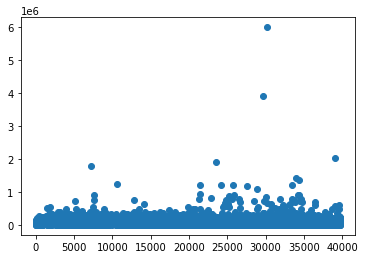

mean: 68777.9671565959
median: 58868.0
mode: 0    60000
dtype: int64
std: 64218.6823944682
quantile_25: 40000.0
quantile_50: 58868.0
quantile_75: 82000.0
quantile_100: 30000.0
No of Records with outliers: 38577


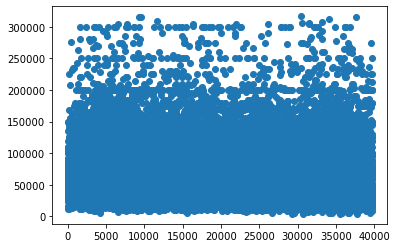

mean_removeoutliers: 66543.51405444797
median: 58187.0
mode: 0    60000
dtype: int64
std: 38494.14070168641
quantile_25: 40000.0
quantile_50: 58187.0
quantile_75: 81600.0
quantile_100: 30000.0
No of Records without outliers: 38422


<AxesSubplot:ylabel='Density'>

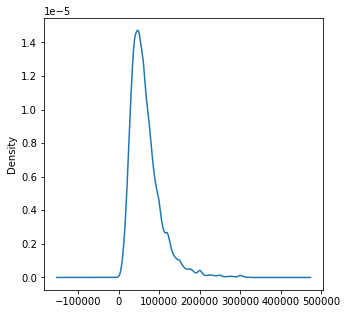

In [16]:
#import libraries for graphs

import matplotlib.pyplot as plt
import seaborn as sns

#Data Dictionary: annual_inc - The self-reported annual income provided by the borrower during registration.
#Assumption: Annual income reported is accurate and verified from documentation provided.  

#Quantative Variable : annual_inc

plt.scatter(df.index,df["annual_inc"])
plt.show()

# From the scatter plot we see there are 2 outliers in the dataframe which has annual income 3900000 & 6000000
# Statistical numbers based on data with outliers
print("mean:", df["annual_inc"].mean())
print("median:",df["annual_inc"].median())
print("mode:",df["annual_inc"].mode())
print("std:",df["annual_inc"].std())
print("quantile_25:",df["annual_inc"].quantile(.25))
print("quantile_50:",df["annual_inc"].quantile(.50))
print("quantile_75:",df["annual_inc"].quantile(.75))
print("quantile_100:",df["annual_inc"].quantile(.1))

print("No of Records with outliers:", df["annual_inc"].count())

#remove the outliers from the dataframe, 0.99 percentile is decided based on scatter plot distribution
df = df[df["annual_inc"] < df['annual_inc'].quantile(0.996) ]

plt.scatter(df.index,df["annual_inc"])
plt.show()

# Statistical numbers based on data with-out outliers
print("mean_removeoutliers:", df["annual_inc"].mean())
print("median:",df["annual_inc"].median())
print("mode:",df["annual_inc"].mode())
print("std:",df["annual_inc"].std())
print("quantile_25:",df["annual_inc"].quantile(.25))
print("quantile_50:",df["annual_inc"].quantile(.50))
print("quantile_75:",df["annual_inc"].quantile(.75))
print("quantile_100:",df["annual_inc"].quantile(.1))
print("No of Records without outliers:",df["annual_inc"].count())

plt.figure(figsize = (5,5))
df["annual_inc"].plot(kind = 'density')

In [17]:
#Binning for annual income group for analysis

df.loc[:,"annual_inc_group"] = pd.qcut(df["annual_inc"],q=4)
df["annual_inc_group"].value_counts()


(3999.999, 40000.0]    9698
(58187.0, 81600.0]     9607
(81600.0, 316800.0]    9604
(40000.0, 58187.0]     9513
Name: annual_inc_group, dtype: int64

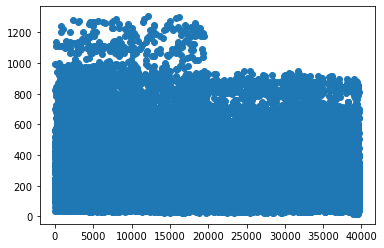

mean: 321.6158521159725
median: 277.425
mode: 0    311.11
dtype: float64
std: 207.63848710905035
quantile_25: 165.67
quantile_50: 277.425
quantile_75: 424.2825
quantile_100: 98.95100000000001


<AxesSubplot:ylabel='Density'>

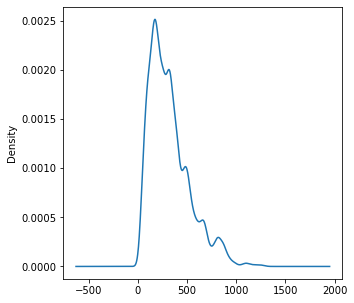

In [18]:
#Data Dictionary: installment - The monthly payment owed by the borrower if the loan originates.
plt.scatter(df.index,df["installment"])
plt.show()


# From the scatter plot we dont see any outliers to confirm the same lets check statistical numbers
print("mean:", df["installment"].mean())
print("median:",df["installment"].median())
print("mode:",df["installment"].mode())
print("std:",df["installment"].std())
print("quantile_25:",df["installment"].quantile(.25))
print("quantile_50:",df["installment"].quantile(.50))
print("quantile_75:",df["installment"].quantile(.75))
print("quantile_100:",df["installment"].quantile(.1))


plt.figure(figsize = (5,5))
df["installment"].plot(kind = 'density')

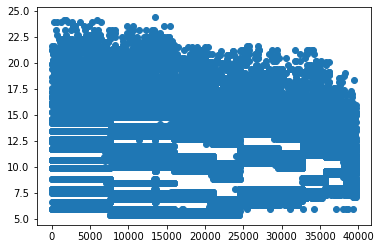

In [19]:
#Data Dictionary: int_rate - Interest Rate on the loan

plt.scatter(df.index ,df["int_rate"])
plt.show()

In [20]:
#Binning for employee experience for analysis

Fresher = ['< 1 year']
Junior = ['1 year','2 years','3 years','4 years']
Senior = ['5 years','6 years','7 years','8 years','9 years']
Professional =['10+ years']


conditions = [
    (df['emp_length'].isin(Fresher)),
    (df['emp_length'].isin(Junior)),
    (df['emp_length'].isin(Senior)),
    (df['emp_length'].isin(Professional)),
    (df['emp_length'].isna())
    ]

values = ['Fresher','Junior','Senior','Professional','Not Specified']

df["emp_exp"] = np.select(conditions, values)

#Sort as per experience levels on employee experience bin
custom_dict = {'Fresher':0, 'Junior':1, 'Senior':2, 'Professional':3, 'Not Specified':4 }  
df['emp_exp'] = pd.Categorical(df['emp_exp'], ['Fresher','Junior','Senior','Professional','Not Specified'])
df.sort_values("emp_exp")
#df.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,pymnt_plan,purpose,title,zip_code,addr_state,dti,acc_now_delinq,chargeoff_within_12_mths,annual_inc_group,emp_exp
39716,7500,36 months,13.75,255.43,E,E2,Evergreen Center,< 1 year,OWN,22000,...,True,debt_consolidation,Consolidation Loan,027xx,MA,14.29,0,NaN,"(3999.999, 40000.0]",Fresher
28986,3000,36 months,14.35,103.05,C,C4,Home Depot,< 1 year,RENT,21600,...,True,moving,ADrew,430xx,OH,16.61,0,0.0,"(3999.999, 40000.0]",Fresher
29000,3000,36 months,11.49,98.92,B,B4,After School Programs Inc.,< 1 year,RENT,24996,...,True,other,The Wright Team,323xx,FL,5.38,0,0.0,"(3999.999, 40000.0]",Fresher
29003,10000,60 months,7.88,186.53,A,A5,Boston ABA,< 1 year,RENT,46800,...,True,wedding,Help us pay for our wedding back home!,017xx,MA,22.15,0,0.0,"(40000.0, 58187.0]",Fresher
29004,2500,36 months,13.61,84.98,C,C2,Brownsville Multi Services BCAP,< 1 year,RENT,27000,...,True,home_improvement,Blessings,112xx,NY,1.87,0,0.0,"(3999.999, 40000.0]",Fresher
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21589,6000,36 months,6.54,184.01,A,A4,NaN,NaN,OWN,19200,...,True,debt_consolidation,personal loan,922xx,CA,12.31,0,0.0,"(3999.999, 40000.0]",Not Specified
31942,2500,36 months,10.62,81.40,B,B3,NaN,NaN,RENT,26400,...,True,other,My Vacation,490xx,MI,21.64,0,0.0,"(3999.999, 40000.0]",Not Specified
8034,5800,36 months,5.99,176.43,A,A2,NaN,NaN,MORTGAGE,24000,...,True,house,home improvemnt,325xx,FL,13.30,0,0.0,"(3999.999, 40000.0]",Not Specified
24421,13500,36 months,6.17,411.74,A,A3,NaN,NaN,MORTGAGE,47400,...,True,credit_card,Wells Refi,960xx,CA,21.39,0,0.0,"(40000.0, 58187.0]",Not Specified


<AxesSubplot:>

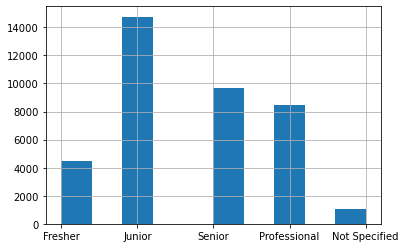

In [21]:
#Biining on applicats employment duration/length

df["emp_exp"].sort_values(ascending = True).hist()

#Observation: juniors who have 1-4 yrs of experience are the highest loan seekers.

<AxesSubplot:ylabel='purpose'>

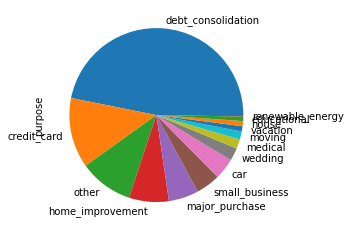

In [22]:
#Data Dictionary: purpose - A category provided by the borrower for the loan request. 

(df["purpose"].value_counts(1)*100).plot(kind = 'pie')

#Observation: A large proportion applicants are applying loan for debt consolidation

<AxesSubplot:>

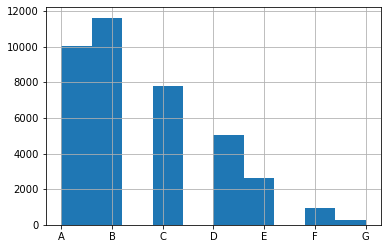

In [23]:
#Data Dictionary: grade - LC assigned loan grade
df["grade"].sort_values().hist()

#Observation : B Grade applications are the highest followed by A, C, D, E, F & G

<AxesSubplot:>

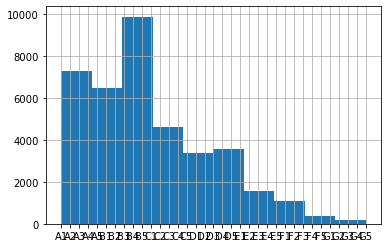

In [24]:
#Data Dictionary: sub_grade - LC assigned loan subgrade

df["sub_grade"].sort_values().hist()

#Observation: B3-C1 has the highest applicants followed by A1-B2

<AxesSubplot:ylabel='term'>

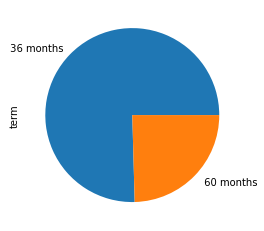

In [25]:
#Data Dictionary: term - The number of payments on the loan. Values are in months and can be either 36 or 60.
(df["term"].value_counts(1)*100).plot(kind = 'pie')

#Observation: most of the loans are 36 months tenure.

<AxesSubplot:ylabel='loan_status'>

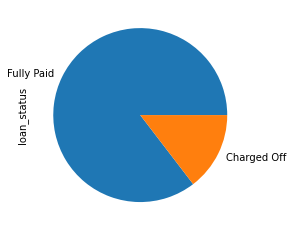

In [26]:
(df["loan_status"].value_counts(1)*100).plot(kind = 'pie')

#Observation: most of the loans are fully paid

<AxesSubplot:>

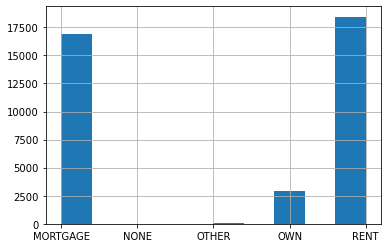

In [27]:
#Data Dictionary:home_ownership - The home ownership status provided by the borrower during registration. Our values are: RENT, OWN, MORTGAGE, OTHER.

df["home_ownership"].sort_values(ascending = True).hist()

#Observation : based on the graph below there are larger applicants who rent/mortgage, there are very few home owners 

<AxesSubplot:ylabel='verification_status'>

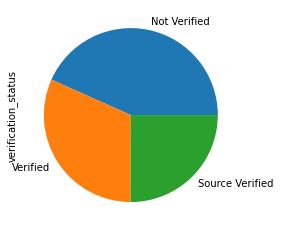

In [28]:
#Data Dictionary: verification_status - Indicates if income was verified by LC, not verified, or if the income source was verified

(df["verification_status"].value_counts(1)*100).plot(kind = 'pie')

#Observation : "not verified" applicants a bit larger compared to verified and source verified 

### Segmented Univariate Analysis

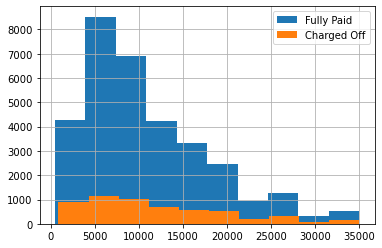

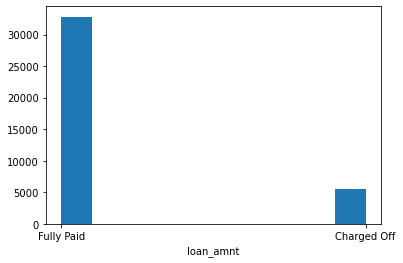

In [29]:
df[df["loan_status"] == "Fully Paid"]["loan_amnt"].hist()
df[df["loan_status"] == "Charged Off"]["loan_amnt"].hist()
plt.legend(["Fully Paid", "Charged Off"])
plt.show()


n, bins, patches = plt.hist(x = df['loan_status'])
plt.xlabel("loan_amnt")
plt.show()

#Observation: Charged off applicants have loan amount below 15k

In [30]:
pd.crosstab(df['emp_exp'], df['loan_status'], margins = True)

#Observation: Juniors who have 1-4 yrs of exp are highest applicants for loan which has highest applicants being charged off and fully paid.

loan_status,Charged Off,Fully Paid,All
emp_exp,,,
Fresher,638,3861,4499
Junior,2031,12727,14758
Senior,1387,8314,9701
Professional,1324,7109,8433
Not Specified,227,804,1031
All,5607,32815,38422


<AxesSubplot:xlabel='emp_exp'>

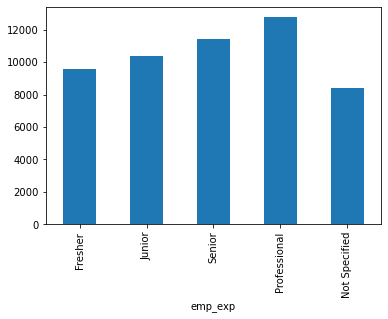

In [31]:
avg_annual_inc = df.groupby("emp_exp")["loan_amnt"].mean()
avg_annual_inc.plot(kind = "bar")

#Observation: Professionals (10+ years) are the applicants who have taken highest average loan amount, followed by Seniors (5-9 yrs of exp), Junior (1-4 yrs of exp) & Fresher (<1 year) 

              mean median   std amin   amax quantile25 quantile50 quantile75
               dti    dti   dti  dti    dti        dti        dti        dti
loan_status                                                                 
Charged Off  14.03  14.33  6.57    0  29.85       9.11      19.30      19.30
Fully Paid   13.18  13.23  6.67    0  29.99       8.03      18.43      18.43


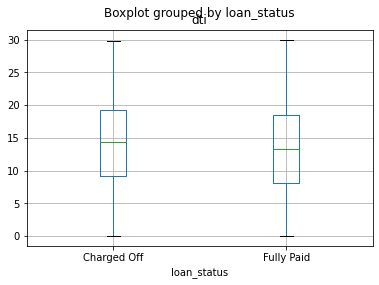

In [32]:
#Data Dictionary: dti - A ratio calculated using the borrower’s total monthly debt payments on the total debt obligations, excluding mortgage and the requested LC loan, divided by the borrower’s self-reported monthly income.

def quantile25(x):
    return np.percentile(x, 25)

def quantile50(x):
    return np.percentile(x, 75)

def quantile75(x):
    return np.percentile(x, 75)

print(df.pivot_table(values = "dti", 
               index = "loan_status",               
               fill_value = 0,
               aggfunc=[np.mean, np.median, np.std, np.min, np.max, quantile25, quantile50, quantile75]).round(2))

df.boxplot(column = ['dti'], by = 'loan_status')
plt.show()

#Observation : charged off applicants report higher percentage of income going to debts compared to fully paid

In [33]:
pd.crosstab(df['purpose'], df['loan_status'], margins = True)

#Observation: there are more number of applicants who took the loan for debt_consolidation and most of them have paid fully.

loan_status,Charged Off,Fully Paid,All
purpose,,,
car,160,1339,1499
credit_card,541,4472,5013
debt_consolidation,2763,15238,18001
educational,56,268,324
home_improvement,342,2497,2839
house,59,305,364
major_purchase,220,1921,2141
medical,106,572,678
moving,91,481,572


In [34]:
df.pivot_table(values = "annual_inc", 
               index = "emp_exp", 
               columns = "loan_status", 
               fill_value = 0,
               aggfunc=np.median).round(2)

#Observation: Loan was paid by all applicants whose average annual income is high compared to charged off applicants

loan_status,Charged Off,Fully Paid
emp_exp,,
Fresher,44444.5,50000
Junior,49200.0,55000
Senior,55000.0,60000
Professional,62000.0,70000
Not Specified,36000.0,38925


In [35]:
df.pivot_table(values = "int_rate", 
               index = "home_ownership", 
               columns = "loan_status",
               fill_value = 0, 
               aggfunc= np.mean).round(2)


#Observation: Most of the applicants paid the loan amount when the average interest rate is less.

loan_status,Charged Off,Fully Paid
home_ownership,,
MORTGAGE,13.79,11.32
NONE,0.00,8.70
OTHER,13.19,11.75
OWN,13.69,11.33
RENT,13.86,11.91


In [36]:
df.pivot_table(values = "annual_inc", 
               index = "home_ownership", 
               columns = "loan_status",
               fill_value = 0, 
               aggfunc= np.mean).round(2)

#Observation: Most of the applicants with higher income have their home mortgaged.

loan_status,Charged Off,Fully Paid
home_ownership,,
MORTGAGE,72686.20,80676.98
NONE,0.00,80733.33
OTHER,63433.06,66412.11
OWN,51251.32,58091.19
RENT,52284.51,56799.65


In [37]:
df.pivot_table(values = ["annual_inc","loan_amnt"], 
               index = "grade", 
               columns = "loan_status",
               fill_value = 0, 
               aggfunc= np.mean).round(0)

#Observation: Applicants with highest average income for Loan grade F are being charged off for highest average loan amount.

annual_inc              loan_amnt           
loan_status Charged Off Fully Paid Charged Off Fully Paid
grade                                                    
A               52510.0    65665.0      7800.0     8660.0
B               57688.0    66678.0     10874.0    10911.0
C               56851.0    66227.0     11024.0    10745.0
D               61394.0    68258.0     12202.0    12085.0
E               69820.0    76599.0     15863.0    15556.0
F               77857.0    82646.0     19243.0    17435.0
G               75658.0    93502.0     18552.0    20934.0

### Bivariate & MultiVariate Analysis

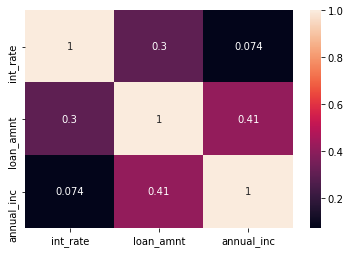

In [38]:
df1 = df[['int_rate','loan_amnt','annual_inc']]
df1.corr()
corrMatrix = df1.corr()
sns.heatmap(corrMatrix, annot=True)
plt.show()

#observation: There is relatively high correlation between annual income compared to loan amount (0.42) 
#             and very low correlation between annual income to interest rate (0.068)

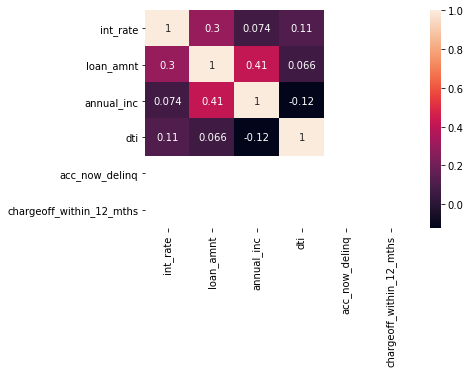

In [39]:
df1 = df[['int_rate','loan_amnt','annual_inc','dti','acc_now_delinq','chargeoff_within_12_mths']]
df1.corr()
corrMatrix = df1.corr()
sns.heatmap(corrMatrix, annot=True)
plt.show()

#Observation: loan amount & interest rate has higest correlation (0.3) out of all variables correlation.
#             dti and annual income has negative correlation (-0.11)
#             loan amount and dti has positive but very little correlation (0.071)
#             Interest rate to annual income has positive but negligible correlation (0.068). 